<a href="https://colab.research.google.com/github/parme31etkaur/Project-by-Python-and-Machine-Learning/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# Import Libraries**





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# **#Calling Dataset**

In [ ]:
heart_disease=pd.read_csv(r"/heart.csv")

# **#Data Info**

In [ ]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 33.3 KB


In [ ]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


# **#Checking for Null Values**

In [ ]:
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
heart_disease.shape

(303, 14)

# **#Data Description**

In [ ]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **#Total Patients With Heart Disease v/s Without Heart Disease**

In [ ]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# **#Correlational Matrix**

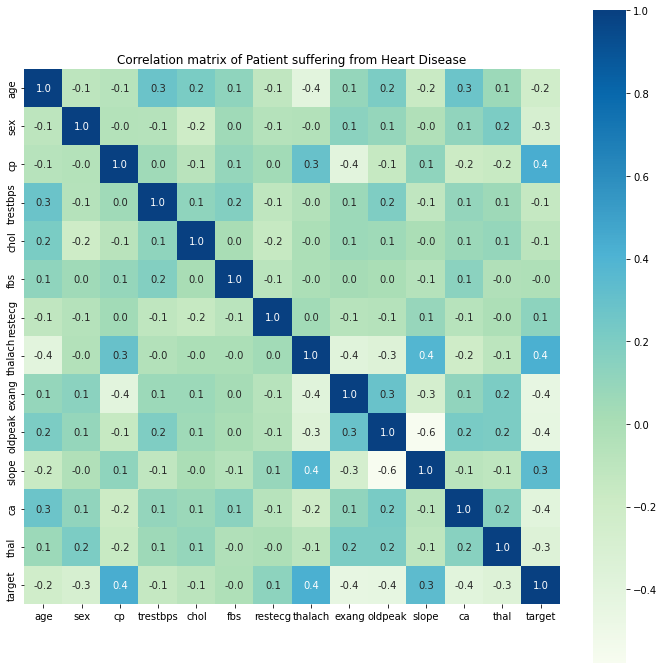

In [ ]:
correlation=heart_disease.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(correlation, annot = True,fmt='.1f',square=True,cmap='GnBu')
plt.title("Correlation matrix of Patient suffering from Heart Disease")
plt.show()

# **#Bar Graph representation of Patients**

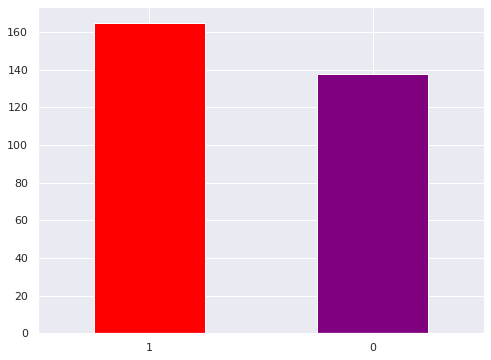

In [ ]:
f,ax=plt.subplots(figsize=(8,6))
heart_disease['target'].unique()
ax=heart_disease['target'].value_counts().plot(kind='bar',color=['red','purple'])
ax.set_xticklabels(heart_disease['target'].value_counts().index,rotation=360)
plt.show()

# **#Histogram for all Attributes**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbad4a2be50>,
      dtype=object)

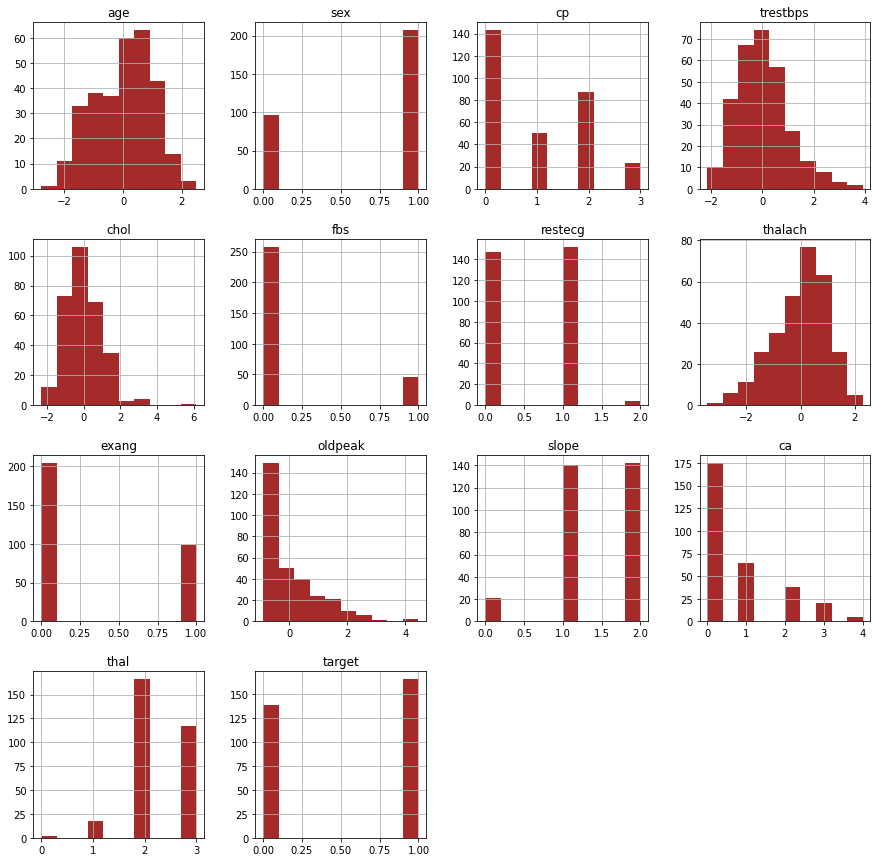

In [ ]:
heart_disease.hist(figsize=(15,15),color='brown')

# **#Splitting Data into Training & Testing Dataset**

In [ ]:
x=heart_disease.drop(['target'],axis=1)
y=heart_disease['target']
x_Train,x_Test,y_Train,y_Test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_Train.shape,x_Test.shape)

(242, 13) (61, 13)


# **#Scaling**

In [ ]:
scaler=StandardScaler()
columns_to_scale=['age','trestbps','chol','thalach','oldpeak']
heart_disease[columns_to_scale] = scaler.fit_transform(heart_disease[columns_to_scale])

# **#K Neighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_scores=[]
for k in range(1,15):
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  knn_classifier.fit(x_Train,y_Train)
  knn_scores.append(knn_classifier.score(x_Test,y_Test))


**Line graph of the number of neighbors and the test score achieved in each case**

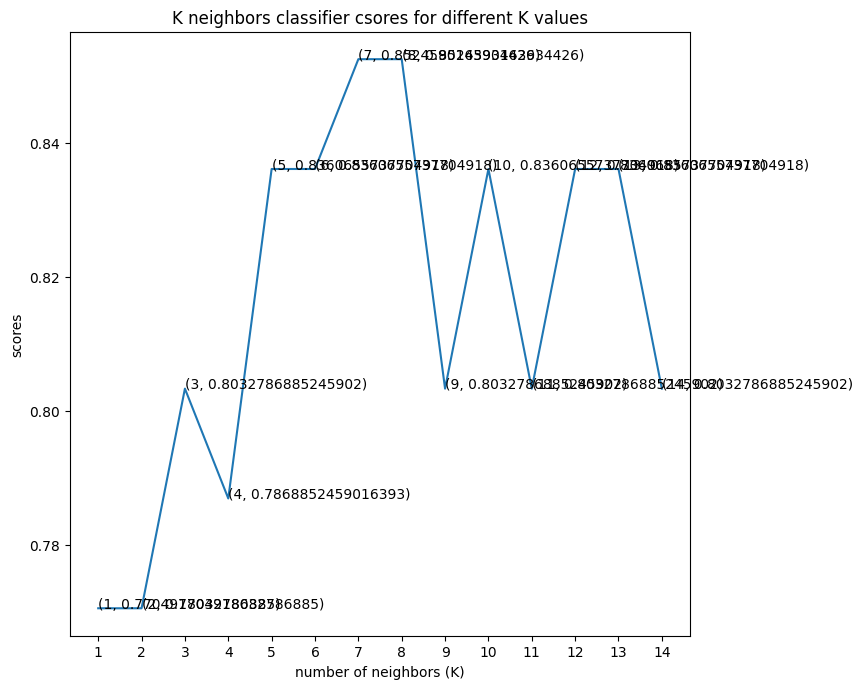

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=100)

plt.plot([k for k in range(1,15)],knn_scores)

for i in range(1,15):
          plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
          plt.xticks([i for i in range(1,15)])
          plt.xlabel('number of neighbors (K)')
          plt.ylabel('scores')
          plt.title('K neighbors classifier csores for different K values')


**#Clustering of Data**

In [ ]:
from sklearn.cluster import KMeans
x=heart_disease.iloc[:,[1,4]].values

In [ ]:
wcss=[]
for i in range(1,4):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=61)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

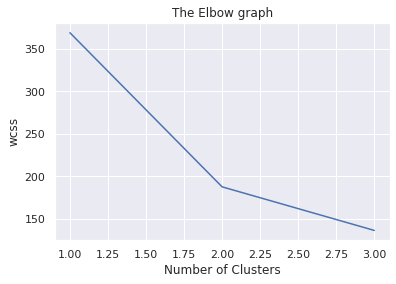

In [ ]:
sns.set()
plt.plot(range(1,4),wcss)
plt.title('The Elbow graph')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')


In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y=kmeans.fit_predict(x)
print(y)

[2 2 0 2 1 0 1 2 0 0 2 2 2 0 2 0 1 0 2 2 2 2 2 2 0 1 0 0 1 0 0 0 0 2 0 0 1
 2 2 1 1 2 0 2 1 1 2 2 0 2 2 1 2 0 2 0 0 2 0 1 2 1 0 0 0 0 0 2 0 0 2 2 0 2
 0 2 2 0 0 2 2 1 1 1 2 1 2 0 0 2 2 0 0 1 0 2 1 2 1 2 2 2 0 2 0 0 2 2 2 2 1
 0 1 0 2 0 0 0 0 2 1 2 2 2 0 0 0 2 0 2 0 2 1 2 1 2 0 0 0 2 1 1 0 0 0 2 2 2
 2 0 2 0 2 2 0 0 2 0 0 0 2 1 0 0 0 2 2 2 2 0 2 2 2 0 0 0 2 1 0 2 1 0 1 2 2
 2 2 2 2 0 1 0 0 2 0 1 2 2 2 2 0 2 2 2 0 2 2 2 0 0 2 2 0 1 2 1 2 1 2 2 1 0
 2 1 2 0 2 0 2 1 2 2 2 2 1 1 1 2 1 2 2 2 0 2 0 2 1 2 2 2 1 2 1 1 2 1 2 0 2
 2 2 2 2 2 0 0 1 0 2 2 2 2 2 2 2 0 0 2 1 0 1 0 0 0 0 1 0 2 1 0 0 1 0 0 0 0
 0 0 2 2 0 0 2]


# **#3-D Representation**

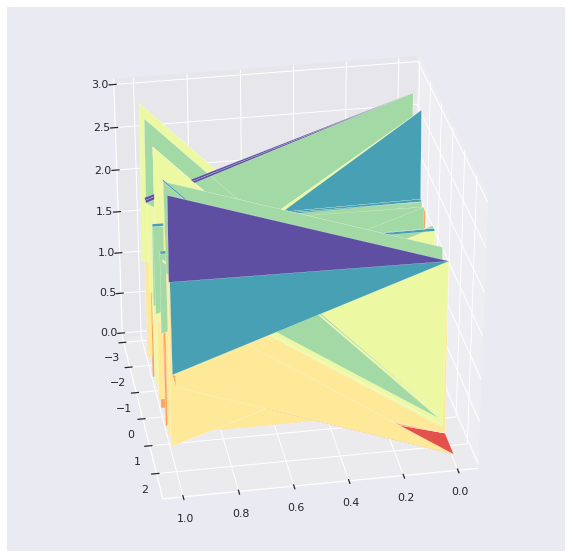

In [ ]:
from scipy.stats import kde
from mpl_toolkits.mplot3d import Axes3D

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([heart_disease.target,heart_disease.sex])
xi, yi = np.mgrid[ heart_disease.target.min():heart_disease.target.max():nbins*1j, heart_disease.age.min():heart_disease.age.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# Make the plot
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_trisurf(heart_disease.target, heart_disease.age, heart_disease.cp, cmap=plt.cm.Spectral, linewidth=0.2)

ax.view_init(30, 80)


# **#Column Names in the Dataset**

In [ ]:
heart_disease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# **#Decision Tree & Model Accuracy**

In [ ]:
dt_gini=DecisionTreeClassifier(criterion='gini', max_depth=6,random_state=0)
dt_gini.fit(x_Train,y_Train)
y_pred=dt_gini.predict(x_Test)
print(y_pred)
from sklearn.metrics import accuracy_score
print('model accuracy is', accuracy_score(y_Test,y_pred))

[0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1]
model accuracy is 0.7704918032786885


[Text(229.303125, 504.7714285714286, 'X[2] <= 0.5\ngini = 0.497\nsamples = 242\nvalue = [111, 131]'),
 Text(136.0125, 427.11428571428576, 'X[11] <= 0.5\ngini = 0.405\nsamples = 117\nvalue = [84, 33]'),
 Text(90.675, 349.4571428571429, 'X[12] <= 2.5\ngini = 0.494\nsamples = 54\nvalue = [24, 30]'),
 Text(41.849999999999994, 271.8, 'X[7] <= -1.318\ngini = 0.367\nsamples = 33\nvalue = [8, 25]'),
 Text(27.9, 194.14285714285717, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(55.8, 194.14285714285717, 'X[12] <= 1.5\ngini = 0.312\nsamples = 31\nvalue = [6, 25]'),
 Text(27.9, 116.48571428571432, 'X[0] <= 0.015\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(13.95, 38.82857142857142, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(41.849999999999994, 38.82857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(83.69999999999999, 116.48571428571432, 'X[0] <= 0.621\ngini = 0.204\nsamples = 26\nvalue = [3, 23]'),
 Text(69.75, 38.82857142857142, 'gini = 0.0\nsamples = 18\nvalue = [0,

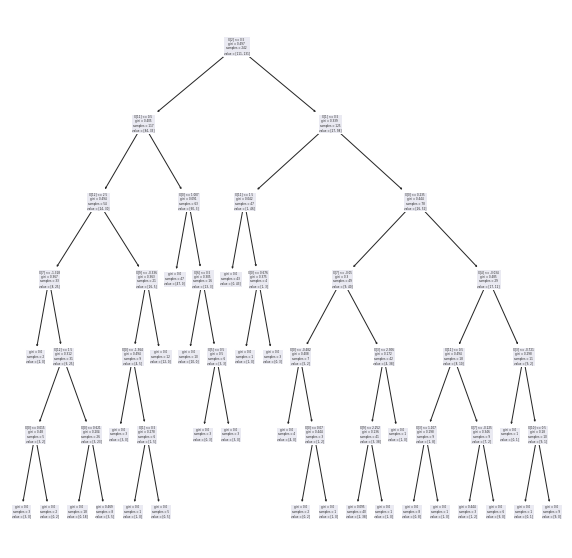

In [ ]:
plt.figure(figsize=(10,10))
from sklearn import tree
tree.plot_tree(dt_gini.fit(x_Train,y_Train))

# **#Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000,random_state=0)
rfc.fit(x_Train,y_Train)
y_pred=rfc.predict(x_Test)
y_pred_train=rfc.predict(x_Train)
print(y_pred)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


# **#Accuracy Score**

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_Test,y_pred)
print('Random Forest Score',np.abs(score)*100)

Random Forest Score 77.04918032786885


In [ ]:
feature_score=pd.Series(rfc.feature_importances_,index=x_Train.columns).sort_values(ascending=False)
print(feature_score)
score=accuracy_score(y_Train,y_pred_train)
print("Random Forest Score=",np.abs(score)*100)

ca          0.135020
cp          0.125643
thalach     0.118184
oldpeak     0.110680
thal        0.098684
age         0.086375
chol        0.077669
trestbps    0.075272
exang       0.059557
sex         0.045212
slope       0.038124
restecg     0.020257
fbs         0.009323
dtype: float64
Random Forest Score= 100.0


# **#Training the Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_Train,y_Train)



LogisticRegression()

# **#Accuracy & Prediction**

In [ ]:
from sklearn.metrics import accuracy_score
x_training_pred=model.predict(x_Train)
training_data_accuracy=accuracy_score(x_training_pred,y_Train)
print('Accuracy of the Training Data=',training_data_accuracy)

Accuracy of the Training Data= 0.8388429752066116


In [ ]:
from matplotlib import test
x_test_pred=model.predict(x_Test)
test_data_accuracy=accuracy_score(x_test_pred,y_Test)
print('Accuracy of the Testing data=',test_data_accuracy)

Accuracy of the Testing data= 0.8524590163934426


In [ ]:
input_report= x_Test[:]
input_data_to_array=np.asarray(input_report)
reshape_data=input_data_to_array.reshape(-1,1)
prediction=model.predict(x_Test[0:1])
print(prediction)

if(prediction[0] == 0):
    print('Patient is not suffering from Heart Disease')
else:
    print('Patient is suffering from Heart Disease')


[0]
Patient is not suffering from Heart Disease


# ***Project by-: Parmeet Kaur***